In [1]:
import numpy as np
import pandas as pd

## Exploratory Data Analysis 

In [214]:
df = pd.read_excel("sample.xlsx", list = 'data')

In [3]:
df.head()

,customer_month_salary,sum_credit_current,term_credit_current,form,sphere,type,EDUCATION,age,marital_status,time_at_work,GENDER,month_passport_issued,month_with_bank,CITY,target,ID
0,52350.25,500000,59,ООО,"Наука, Образование, Здравоохранение",вспомогательный персонал,высшее,44,холост / не замужем,68.0,мужской,124,67.0,Москва,1,1
1,115000.00,400000,60,Иная форма,Другое,специалист,высшее,30,холост / не замужем,96.0,мужской,107,68.0,Москва,1,2
2,87000.00,361000,60,ОАО,"Финансы, управляющие компании, банки, страхование",специалист,Высшее/Второе высшее/Ученая степень,28,женат / замужем,117.0,женский,2,72.0,Москва,1,3
3,145358.17,1499000,60,ЗАО,"Финансы, управляющие компании, банки, страхование",менеджер среднего звена,Высшее/Второе высшее/Ученая степень,30,женат / замужем,35.0,мужской,124,70.0,Москва,1,4
4,50000.00,365000,60,ООО,Другое,специалист,среднее-специальное,31,холост / не замужем,48.0,мужской,131,88.0,Москва,1,5


In [4]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [215]:
missing_data(df)

,customer_month_salary,sum_credit_current,term_credit_current,form,sphere,type,EDUCATION,age,marital_status,time_at_work,GENDER,month_passport_issued,month_with_bank,CITY,target,ID
Total,41,0,0,22,19,26,17,0,0,17,0,0,1039,4,0,0
Percent,0.859359,0,0,0.461119,0.398239,0.544959,0.356319,0,0,0.356319,0,0,21.7774,0.0838399,0,0
Types,float64,int64,int64,object,object,object,object,int64,object,float64,object,int64,float64,object,int64,int64


In [6]:
df.shape

(4771, 16)

In [94]:
df = df.dropna()

In [95]:
df.shape

(3686, 16)

In [10]:
import seaborn as sns

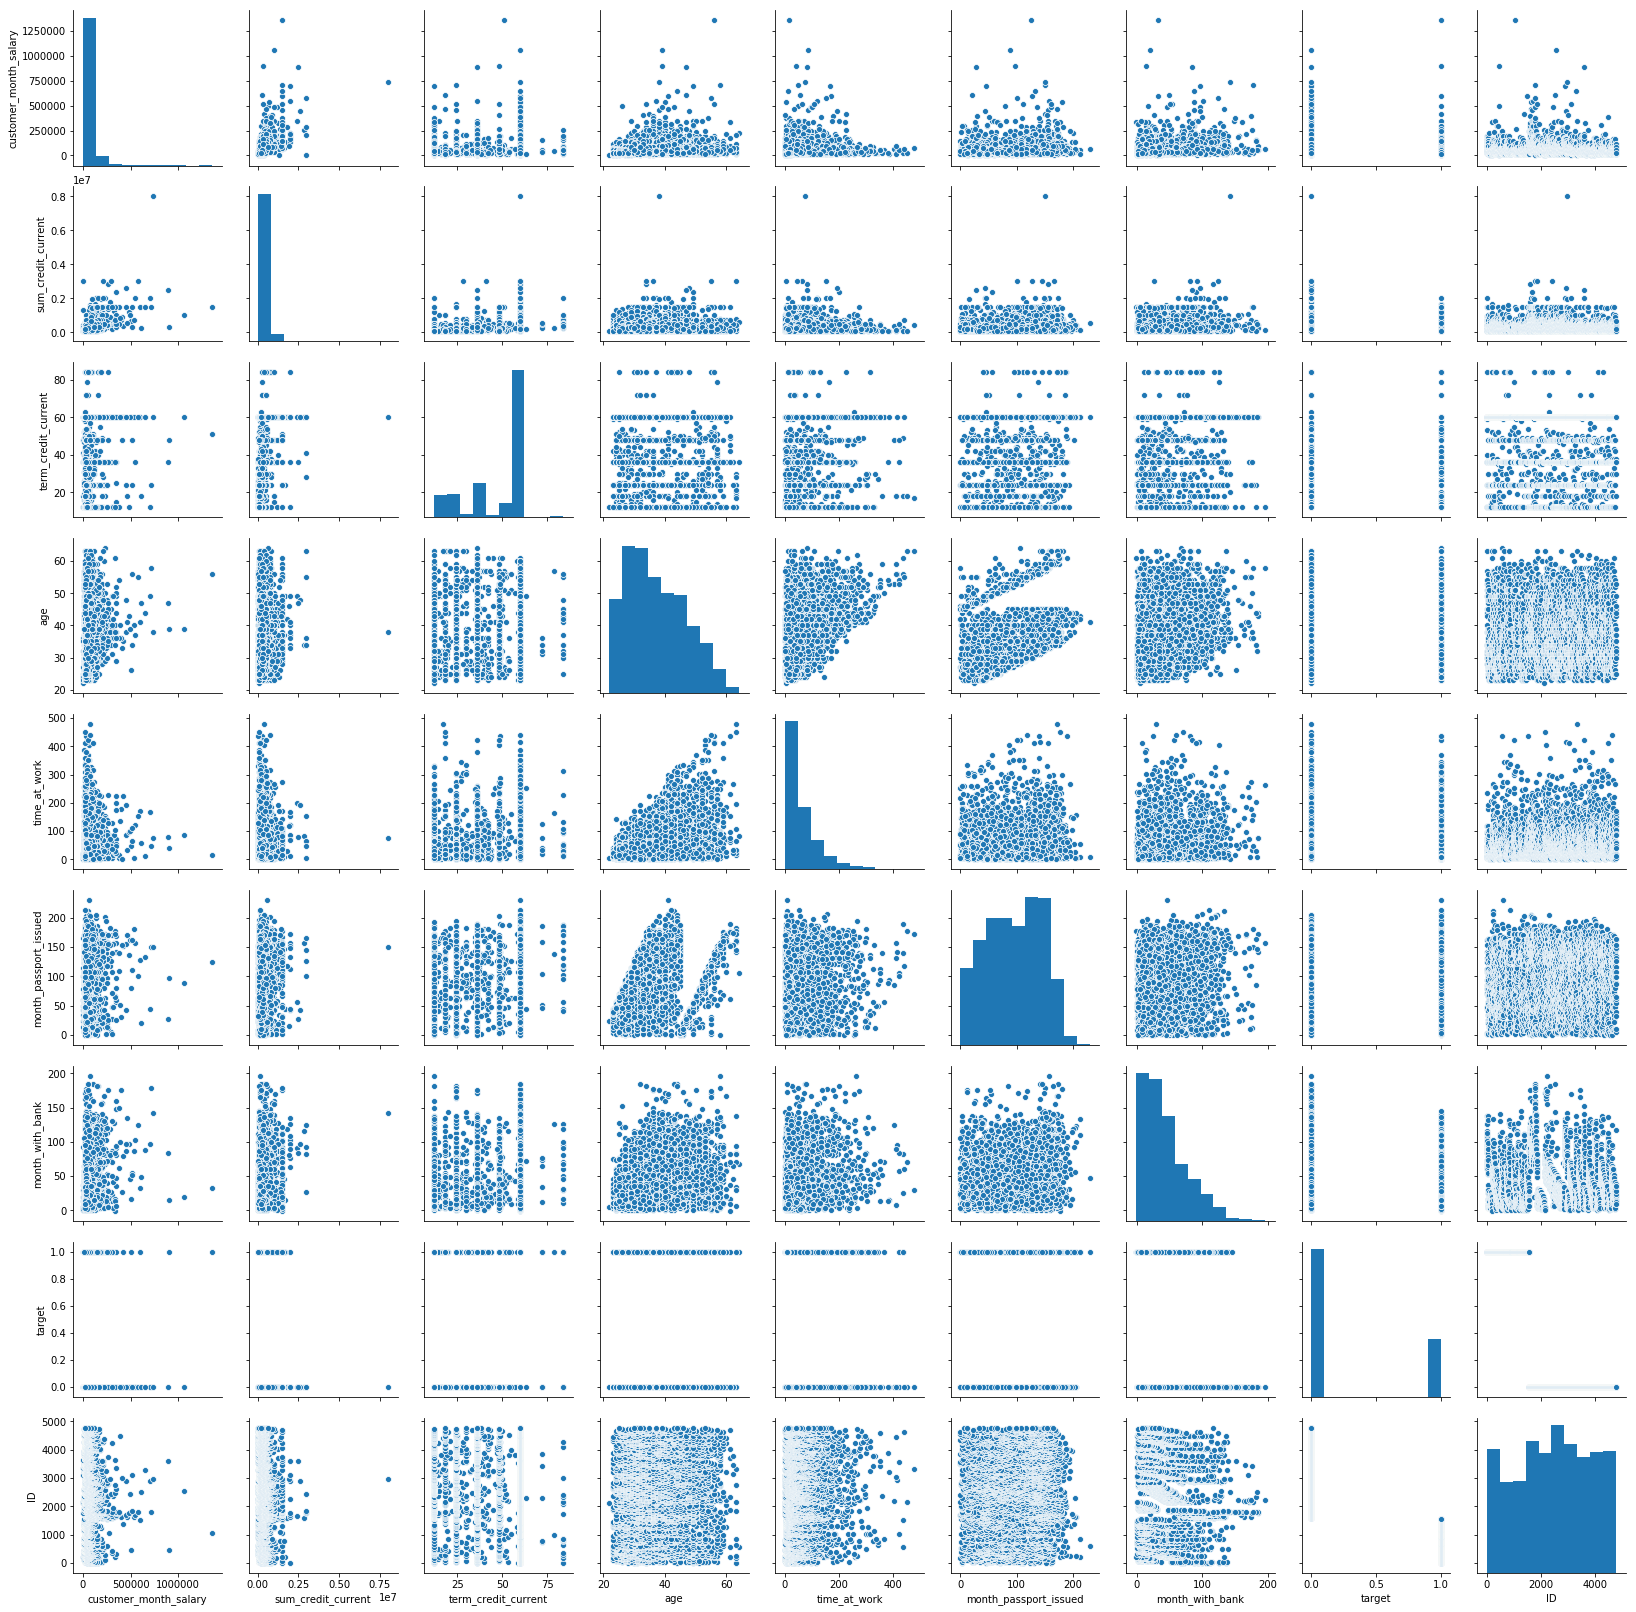

In [11]:
sns.pairplot(df)

In [13]:
df_corr = df.corr()

In [14]:
df_corr

,customer_month_salary,sum_credit_current,term_credit_current,age,time_at_work,month_passport_issued,month_with_bank,target,ID
customer_month_salary,1.000000,0.534791,-0.005705,0.101897,0.053564,0.097867,0.229069,-0.073656,-0.067028
sum_credit_current,0.534791,1.000000,0.273665,0.061612,0.029841,0.084309,0.201319,-0.061236,-0.063846
term_credit_current,-0.005705,0.273665,1.000000,0.002621,0.015083,0.018660,0.009591,0.121883,-0.062758
age,0.101897,0.061612,0.002621,1.000000,0.395068,0.108508,0.258703,-0.023630,0.010638
time_at_work,0.053564,0.029841,0.015083,0.395068,1.000000,0.109640,0.239169,-0.054429,0.063953
month_passport_issued,0.097867,0.084309,0.018660,0.108508,0.109640,1.000000,0.151000,-0.081909,0.075853
month_with_bank,0.229069,0.201319,0.009591,0.258703,0.239169,0.151000,1.000000,-0.130556,-0.035157
target,-0.073656,-0.061236,0.121883,-0.023630,-0.054429,-0.081909,-0.130556,1.000000,-0.796129
ID,-0.067028,-0.063846,-0.062758,0.010638,0.063953,0.075853,-0.035157,-0.796129,1.000000


In [18]:
correlations = df.corr()['target'].sort_values()

print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())

Most Positive Correlations:
 sum_credit_current    -0.061236
time_at_work          -0.054429
age                   -0.023630
term_credit_current    0.121883
target                 1.000000
Name: target, dtype: float64

Most Negative Correlations:
 ID                      -0.796129
month_with_bank         -0.130556
month_passport_issued   -0.081909
customer_month_salary   -0.073656
sum_credit_current      -0.061236
Name: target, dtype: float64


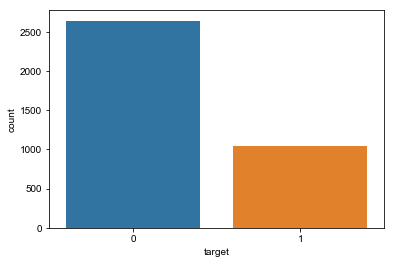

In [16]:
df['target'].value_counts()
sns.countplot(df['target'])
sns.set_style('whitegrid')

## Feature Engineering

In [96]:
df['myFeature1'] = np.log(df.customer_month_salary)
df['myFeature2'] = df.term_credit_current / df.month_with_bank
df['myFeature3'] = df.time_at_work / df.age
df['myFeature4'] = (12 * (df.sum_credit_current/df.term_credit_current)) / (df.customer_month_salary * 12)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [54]:
#catfeats = [c for c in df.columns if c == object]

In [97]:
new_df = df.drop("ID", axis=1)

In [98]:
new_with_dummies = pd.get_dummies(new_df, drop_first=True)

In [99]:
new_with_dummies = new_with_dummies.dropna()

In [68]:
from sklearn.model_selection import train_test_split

In [151]:
y = new_with_dummies["target"]
X = new_with_dummies.drop('target', axis = 1)

In [103]:
X.head()

,customer_month_salary,sum_credit_current,term_credit_current,age,time_at_work,month_passport_issued,month_with_bank,myFeature1,myFeature2,myFeature3,...,CITY_Таганрог,CITY_Тольятти,CITY_Томск,CITY_Тула,CITY_Тюмень,CITY_Уфа,CITY_Челябинск,CITY_Череповец,CITY_Чита,CITY_Ярославль
0,52350.25,500000,59,44,68.0,124,67.0,10.865712,0.880597,1.545455,...,0,0,0,0,0,0,0,0,0,0
1,115000.00,400000,60,30,96.0,107,68.0,11.652687,0.882353,3.200000,...,0,0,0,0,0,0,0,0,0,0
2,87000.00,361000,60,28,117.0,2,72.0,11.373663,0.833333,4.178571,...,0,0,0,0,0,0,0,0,0,0
3,145358.17,1499000,60,30,35.0,124,70.0,11.886956,0.857143,1.166667,...,0,0,0,0,0,0,0,0,0,0
4,50000.00,365000,60,31,48.0,131,88.0,10.819778,0.681818,1.548387,...,0,0,0,0,0,0,0,0,0,0


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [119]:
X_train.shape, y_train.shape

((2580, 113), (2580,))

## Feature Selection with LGBM

In [134]:
import lightgbm as lgb
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [118]:
features = [c for c in X.columns]
target = y_train

In [130]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'dart',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': 12,  
    'metric':'auc',
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [132]:
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(X_train))
predictions = np.zeros(len(X_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(X_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 100000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 100)
    oof[val_idx] = clf.predict(X_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(X_test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[7]	training's auc: 0.651377	valid_1's auc: 0.67272
Fold 1
Training until validation scores don't improve for 100 rounds.
[200]	training's auc: 0.745533	valid_1's auc: 0.651887
Early stopping, best iteration is:
[174]	training's auc: 0.734826	valid_1's auc: 0.667929
Fold 2
Training until validation scores don't improve for 100 rounds.
[200]	training's auc: 0.732629	valid_1's auc: 0.646505
Early stopping, best iteration is:
[199]	training's auc: 0.732696	valid_1's auc: 0.646655
Fold 3
Training until validation scores don't improve for 100 rounds.
[200]	training's auc: 0.733585	valid_1's auc: 0.66129
Early stopping, best iteration is:
[187]	training's auc: 0.733457	valid_1's auc: 0.669131
Fold 4
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[57]	training's auc: 0.712769	valid_1's auc: 0.609543
Fold 5
Training until validation scores 

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


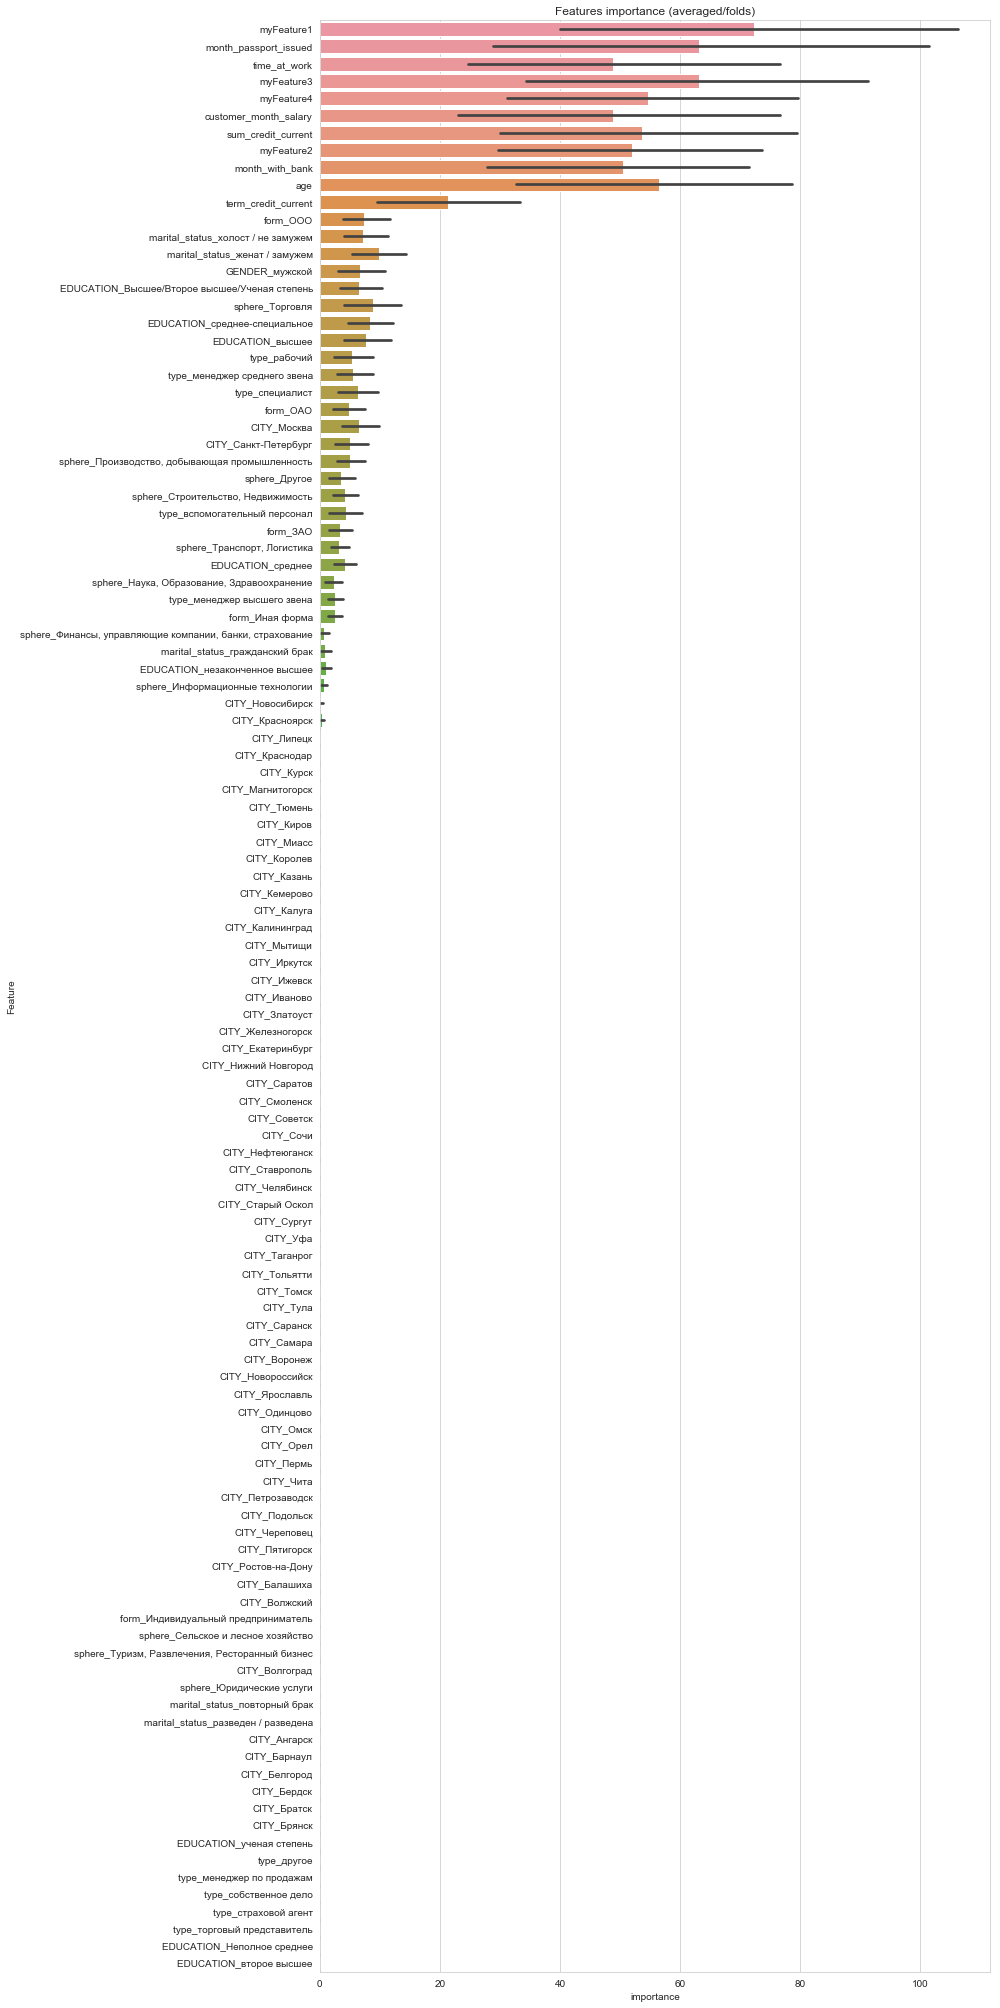

In [135]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
#plt.savefig('FI.png')

### Building models on meaningfuf features

In [162]:
#X = X[["myFeature1", "month_passport_issued", "time_at_work", 
#       "myFeature3", "myFeature4", "customer_month_salary", "sum_credit_current", 
#      "myFeature2", "month_with_bank", "age", "term_credit_current"]]

## Models

In [195]:
df = pd.read_excel("sample.xlsx", list = 'data')

In [196]:
df = df.dropna()

In [197]:
df['myFeature1'] = np.log(df.customer_month_salary)
df['myFeature2'] = df.term_credit_current / df.month_with_bank
df['myFeature3'] = df.time_at_work / df.age
df['myFeature4'] = (12 * (df.sum_credit_current/df.term_credit_current)) / (df.customer_month_salary * 12)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [209]:
y_train.head()

4353    0
1668    0
1131    1
1497    1
1796    0
Name: target, dtype: int64

In [199]:
y =df["target"]

In [201]:
X = X[["myFeature1", "month_passport_issued", "time_at_work", "myFeature3", "myFeature4", "customer_month_salary", "sum_credit_current", "myFeature2", "month_with_bank", "age", "term_credit_current"]]

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
